# 일러스트 파일(.ai) -> SVG 파일로 변환
- WSL2에 Inkscape 설치 및 활용
    - sudo apt update
    - sudo apt install inkscape
    - inkscape --version

# Inkscape 버전 업그레이드
- sudo add-apt-repository ppa:inkscape.dev/stable
- sudo apt update
- sudo apt install inkscape
- 이후 wsl 터미널에 inkscape --version 입력해서 1.3 이상인지 확인

In [ ]:
# import subprocess
# import os
# import glob

# # --- 설정 (WSL2 경로 형식으로 수정) ---
# # AI 파일들이 있는 폴더 (예: Windows의 'C:\ai_files' 폴더)
# input_folder = "./sample_data"

# # SVG 파일들을 저장할 폴더 (예: Windows의 'C:\svg_output' 폴더)
# output_folder = "./svg_output"
# # --- ---

# # 출력 폴더가 없으면 생성
# os.makedirs(output_folder, exist_ok=True)

# # 입력 폴더에서 모든 .ai 파일 목록 가져오기
# # os.path.join은 실행 환경(WSL2)에 맞춰 자동으로 '/'를 사용해 경로를 만듭니다.
# search_path = os.path.join(input_folder, '*.ai')
# ai_files = glob.glob(search_path)

# if not ai_files:
#     print(f"'{input_folder}'에서 AI 파일을 찾을 수 없습니다.")
# else:
#     print(f"총 {len(ai_files)}개의 파일을 변환합니다...")

#     for ai_path in ai_files:
#         # 파일명 추출
#         file_name_without_ext = os.path.splitext(os.path.basename(ai_path))[0]
        
#         # 저장될 SVG 파일의 전체 경로 생성
#         svg_path = os.path.join(output_folder, f"{file_name_without_ext}.svg")
        
#         # Inkscape 실행 명령어 (코드 자체는 Windows 버전과 동일)
#         command = [
#             "inkscape",
#             ai_path,
#             f"--export-plain-svg={svg_path}"
#         ]
        
#         print(f"-> 변환 중: {os.path.basename(ai_path)}")
        
#         try:
#             # WSL2의 Inkscape를 사용하여 명령어 실행
#             subprocess.run(command, check=True, capture_output=True, text=True)
#             print(f"   ✅ 성공: {svg_path}")
#         except subprocess.CalledProcessError as e:
#             print(f"   ❌ 실패: {os.path.basename(ai_path)}")
#             print(f"      Error: {e.stderr}") # 에러 원인 확인 시 주석 해제

#     print("\n모든 작업이 완료되었습니다.")

총 1개의 파일을 변환합니다...
-> 변환 중: 250718_01.ai
   ✅ 성공: ./svg_output/250718_01.svg

모든 작업이 완료되었습니다.


In [7]:
import subprocess
import os
import glob

# --- 설정 ---
input_folder = "./sample_data"
output_folder = "./svg_output"
# --- ---

os.makedirs(output_folder, exist_ok=True)

search_path = os.path.join(input_folder, '*.ai')
ai_files = glob.glob(search_path)

if not ai_files:
    print(f"'{input_folder}'에서 AI 파일을 찾을 수 없습니다.")
else:
    print(f"총 {len(ai_files)}개의 파일을 변환합니다...")

    for ai_path in ai_files:
        file_name_without_ext = os.path.splitext(os.path.basename(ai_path))[0]
        svg_path = os.path.join(output_folder, f"{file_name_without_ext}.svg")
        
        # 최신 Inkscape (1.0 이상) 버전에 맞는 명령어
        # 입력 파일을 맨 마지막에 두는 것이 최신 방식입니다.
        command = [
            "inkscape",
            ai_path,  # 입력 파일을 먼저 지정
            f"--export-filename={svg_path}"
        ]
        
        print(f"-> 변환 중: {os.path.basename(ai_path)}")
        
        try:
            result = subprocess.run(command, check=True, capture_output=True, text=True)
            print(f"   ✅ 성공: {svg_path}")
        except subprocess.CalledProcessError as e:
            print(f"   ❌ 실패: {os.path.basename(ai_path)}")
            print(f"       Error: {e.stderr.strip()}")

    print("\n모든 작업이 완료되었습니다.")

총 1개의 파일을 변환합니다...
-> 변환 중: 250718_01.ai
   ✅ 성공: ./svg_output/250718_01.svg

모든 작업이 완료되었습니다.


# SVG 파일 시각화 하기

In [8]:
from IPython.display import display, SVG, HTML, Image

# 변환된 SVG 파일 경로
svg_file_path = "./svg_output/250718_01.svg"

# 방법 1: SVG 객체로 직접 표시 (가장 권장)
# SVG의 모든 속성을 유지하며 가장 정확하게 표시합니다.
print("--- 1. display.SVG() 사용 ---")
display(SVG(filename=svg_file_path))


# 방법 2: HTML <img> 태그로 표시
# 크기 조절 등 HTML/CSS 속성을 함께 적용하고 싶을 때 유용합니다.
print("\n--- 2. display.HTML() 사용 (크기 조절 예시) ---")
display(HTML(f'<img src="{svg_file_path}" width="900px">'))


--- 1. display.SVG() 사용 ---



--- 2. display.HTML() 사용 (크기 조절 예시) ---


# SVG 파일 XML로 분리하기

✅ 총 3개의 레이어(<g> 태그)를 감지했습니다.


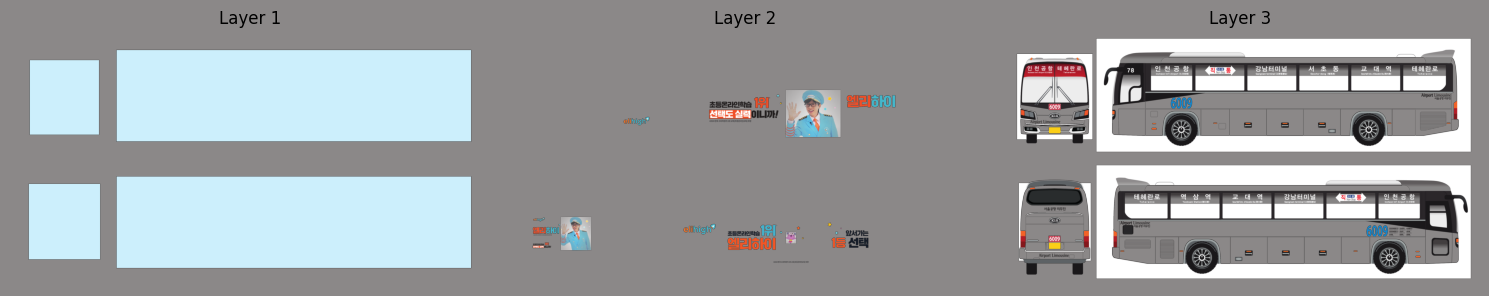

In [11]:
import xml.etree.ElementTree as ET
import cairosvg
import matplotlib.pyplot as plt
import io
import math

# --- 1. 파일 경로 설정 ---
svg_file_path = './svg_output/250718_01.svg'

# --- 2. SVG 파일 파싱 및 레이어(최상위 <g> 태그) 추출 ---
try:
    # SVG 파일(XML)을 파싱합니다.
    tree = ET.parse(svg_file_path)
    root = tree.getroot()

    # SVG의 네임스페이스를 가져옵니다. SVG 태그를 찾기 위해 필수적입니다.
    # root.tag가 '{http://www.w3.org/2000/svg}svg' 와 같은 형태이므로 추출합니다.
    namespace = root.tag.split('}')[0][1:]
    ns = {'svg': namespace}

    # 재사용될 정의(<defs>)와 최상위 그룹(<g>) 태그들을 찾습니다.
    # <defs>는 클리핑, 마스크 등에 사용되므로 각 레이어에 포함시켜야 합니다.
    defs = root.find('svg:defs', ns)
    top_level_groups = root.findall('svg:g', ns)
    
    print(f"✅ 총 {len(top_level_groups)}개의 레이어(<g> 태그)를 감지했습니다.")

    # --- 3. 각 레이어를 개별 SVG로 만들고 시각화 ---
    if top_level_groups:
        num_layers = len(top_level_groups)
        # 보기 좋게 한 줄에 3개씩 이미지를 배치합니다.
        cols = 3
        rows = math.ceil(num_layers / cols)
        
        fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))
        # axes를 1차원 배열로 만들어 다루기 쉽게 합니다.
        axes = axes.flatten()
        fig.patch.set_facecolor("#8b8888")

        for i, g_element in enumerate(top_level_groups):
            # 새로운 SVG 루트를 생성하고 원본의 속성(viewBox 등)을 복사합니다.
            new_root = ET.Element('svg', attrib=root.attrib)
            
            # 원본의 <defs>가 있다면 추가합니다.
            if defs is not None:
                new_root.append(defs)
            
            # 현재 순회의 <g> 태그(레이어)를 추가합니다.
            new_root.append(g_element)
            
            # 새로운 SVG XML 트리를 문자열로 변환합니다.
            svg_string = ET.tostring(new_root, encoding='unicode')
            
            # SVG 문자열을 PNG 이미지 바이트로 변환합니다.
            png_bytes = cairosvg.svg2png(bytestring=svg_string.encode('utf-8'))
            
            # PNG 바이트를 Matplotlib에서 읽을 수 있는 이미지로 변환합니다.
            img = plt.imread(io.BytesIO(png_bytes))
            
            # 서브플롯에 이미지를 표시합니다.
            ax = axes[i]
            # ax.set_facecolor("#94949E") # 옅은 회색 계열 색상 코드
            ax.imshow(img)
            ax.set_title(f'Layer {i+1}')
            ax.axis('off') # 축 숨기기

        # 남는 서브플롯이 있다면 숨깁니다.
        for j in range(num_layers, len(axes)):
            axes[j].axis('off')
            
        plt.tight_layout()
        plt.show()

except FileNotFoundError:
    print(f"❌ 오류: '{svg_file_path}' 파일을 찾을 수 없습니다.")
except ET.ParseError:
    print(f"❌ 오류: 파일을 SVG(XML) 형식으로 파싱할 수 없습니다. 파일이 손상되었을 수 있습니다.")

In [13]:
# 필요한 라이브러리를 추가합니다.
import numpy as np

# ... (이전 코드는 동일) ...

for i, g_element in enumerate(top_level_groups):
    # 새로운 SVG 루트를 생성하고 원본의 속성(viewBox 등)을 복사합니다.
    new_root = ET.Element('svg', attrib=root.attrib)
    
    # 원본의 <defs>가 있다면 추가합니다.
    if defs is not None:
        new_root.append(defs)
    
    # 현재 순회의 <g> 태그(레이어)를 추가합니다.
    new_root.append(g_element)
    
    # 새로운 SVG XML 트리를 문자열로 변환합니다.
    svg_string = ET.tostring(new_root, encoding='unicode')
    
    # SVG 문자열을 PNG 이미지 바이트로 변환합니다.
    png_bytes = cairosvg.svg2png(bytestring=svg_string.encode('utf-8'))
    
    # PNG 바이트를 Matplotlib에서 읽을 수 있는 이미지(Numpy 배열)로 변환합니다.
    img = plt.imread(io.BytesIO(png_bytes))
    
    # --- [추가된 부분] 레이어 2 (i=1)의 픽셀 카운트 ---
    if i == 1:
        # img 배열의 모양(세로, 가로, 채널)에서 4번째 채널(알파)을 선택합니다.
        alpha_channel = img[:, :, 3] 
        
        # 알파 채널 값이 0보다 큰 픽셀(투명하지 않은 픽셀)을 찾습니다.
        non_transparent_pixels = np.sum(alpha_channel > 0)
        
        print(f"🎨 레이어 2의 투명하지 않은 픽셀 수: {non_transparent_pixels}개")
    # --- [여기까지 추가] ---
    
    # 서브플롯에 이미지를 표시합니다.
    ax = axes[i]
    ax.imshow(img)
    ax.set_title(f'Layer {i+1}')
    ax.axis('off') # 축 숨기기

🎨 레이어 2의 투명하지 않은 픽셀 수: 293540개


In [13]:
root

<Element '{http://www.w3.org/2000/svg}svg' at 0x79cc6011a1b0>

In [15]:
namespaces = {'svg': 'http://www.w3.org/2000/svg'}
layers = root.findall('svg:g', namespaces)

In [16]:
layers

[<Element '{http://www.w3.org/2000/svg}g' at 0x79cc6015a660>]